In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 그레이 스케일로 이미지 읽기
img = cv2.imread('./img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

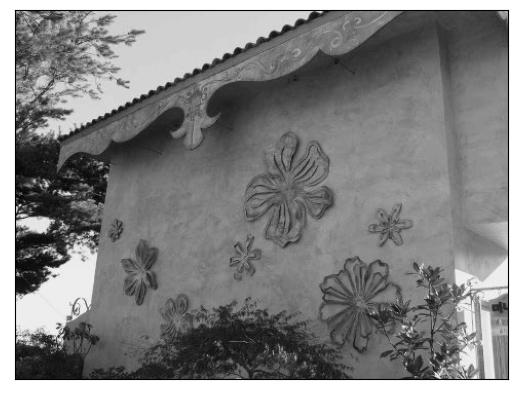

In [4]:
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
# 정규화 직접 연산
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

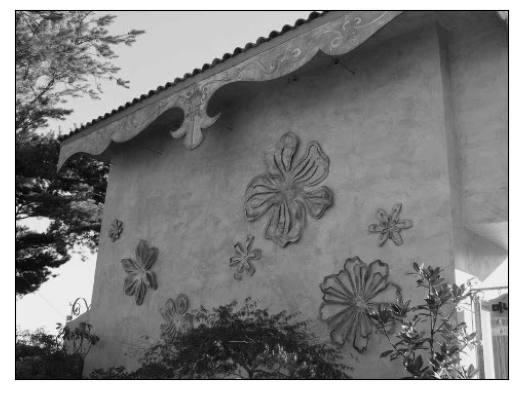

In [6]:
plt.imshow(img_norm, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
# OpenCV API를 이용한 정규화
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

In [8]:
# 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

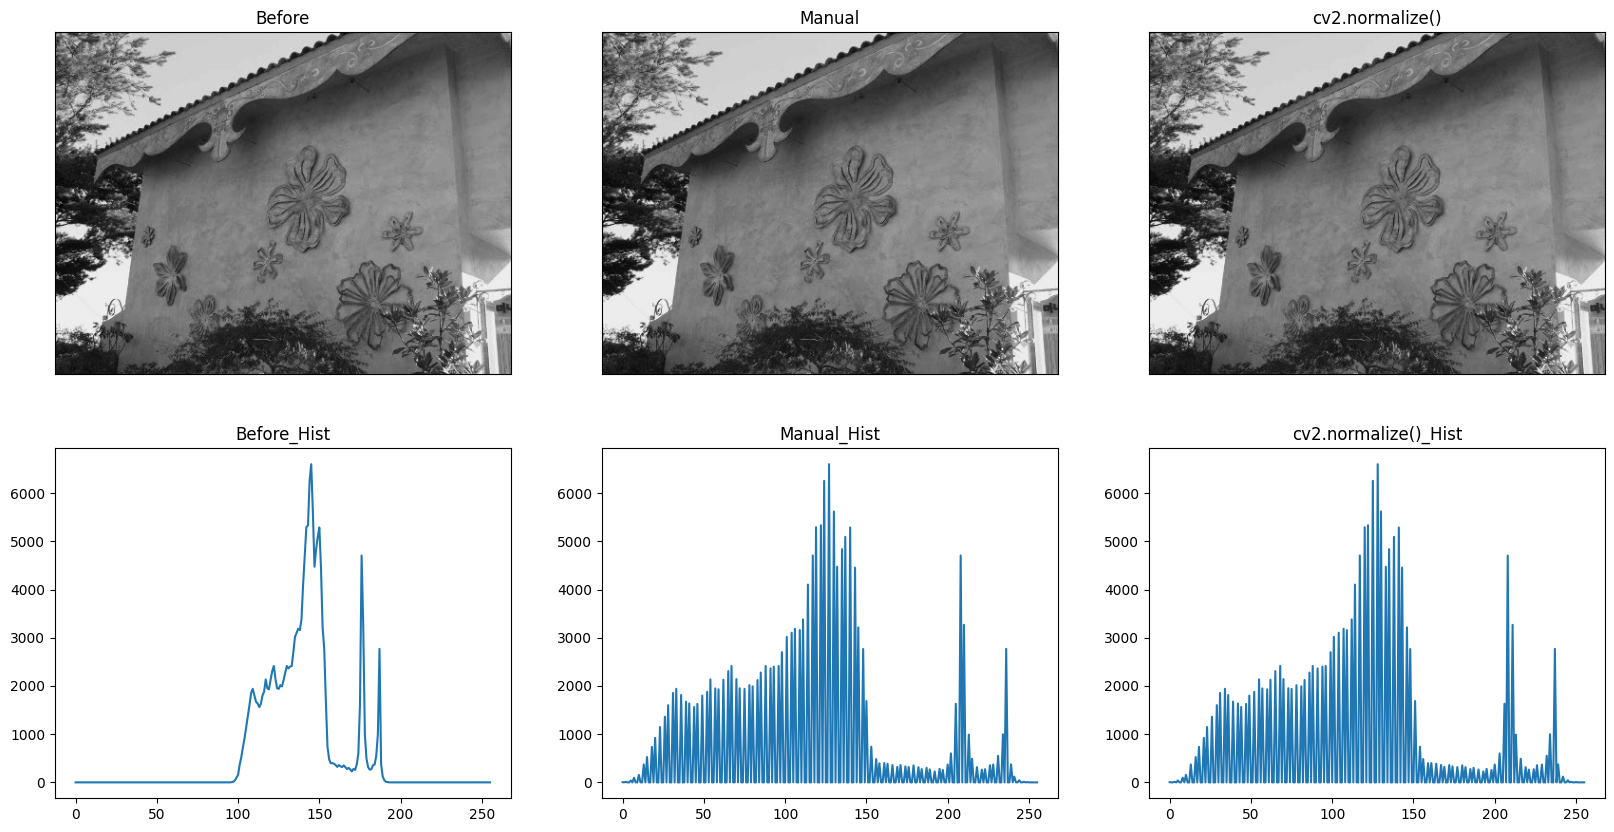

In [10]:
# 결과 출력
imgs = {'Before':img, 'Manual':img_norm, 'cv2.normalize()':img_norm2,
       'Before_Hist':hist, 'Manual_Hist':hist_norm, 'cv2.normalize()_Hist':hist_norm2}

fig = plt.figure(figsize=(20, 10))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(k)
    if i < 3:
        plt.imshow(v, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.plot(v)
plt.show()